# Market segmentation

In the sample data profile, each observation is a client, and we have scored their satisfaction and brand loyality.
data was gathered through; 1- satisfaction is self-reported survey, where people asked to rate their shopping experince from 1 to 10 where 10 means extermely satisfied.

2- Brand loyality on the other hand, measured through number of purchases for one year, on a [-2.5 - 2.5] scale.


Note: Loyality is already standarized.

## Import the relevant libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
from sklearn.cluster import KMeans

## Load the data

In [63]:
data = pd.read_csv ('satisfaction_loyality_sample_Data.csv')

In [64]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyalty')

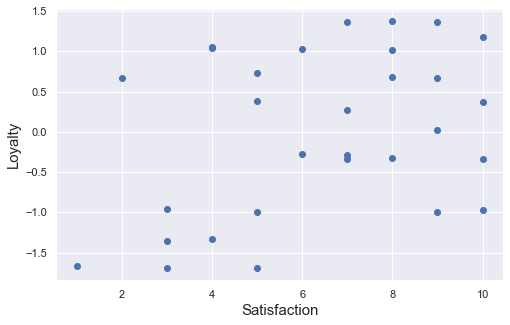

In [65]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction',fontsize=15)
plt.ylabel('Loyalty',fontsize=15)

## Clustering

In [66]:
x = data.copy()

In [107]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [108]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

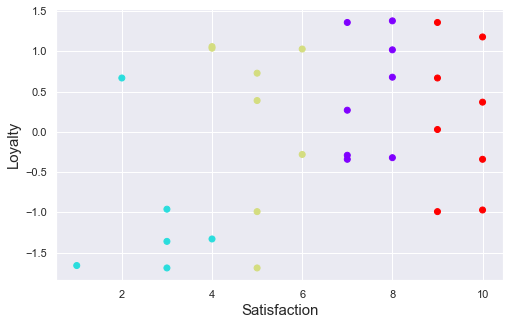

In [109]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction',fontsize=15)
plt.ylabel('Loyalty',fontsize=15)

## Standardize the variables

In [97]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## The Elbow method

In [98]:
wcss =[]

for i in range(1,10):
    
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.398758288946922,
 4.577850786434791,
 3.7576929718931127]

Text(0, 0.5, 'WCSS')

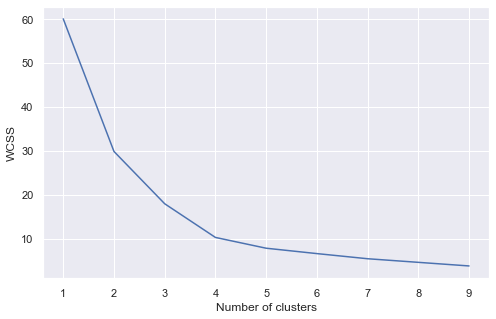

In [99]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [110]:
kmeans_new = KMeans(4)

In [111]:
kmeans_new.fit(x_scaled)

KMeans(n_clusters=4)

In [112]:
clusters_new = x.copy()
clusters_new['cluster_prd2'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_prd2
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

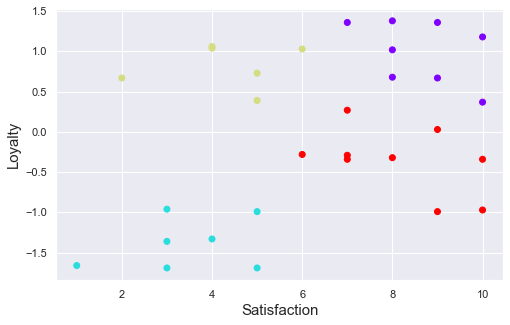

In [114]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_prd2'],cmap='rainbow')
plt.xlabel('Satisfaction',fontsize=15)
plt.ylabel('Loyalty',fontsize=15)

Based on the elbow rule, the best number of cluster would be 4 or 5 clusters, cluster_1 is for people who are dissatisfied and not loyal, cluster_2 for supporters who are not that happy with shopping experince but still they like the brand and keep coming back, roamers is the third cluster for people who like the brand but are not loyal to it.
Finally, the forth cluster 'fans' for people who are very satisfied with the shopping experince and also very loyal.

The goal is to gain more fans by shifting supporter and no satisfied clients into fans by making them more satisfied through enhancing their shopping experinces, for roamers we can introduce loyality programs (such as loyality cards, discount vouchers) to get these people to be loyal customers.

The analysis also showed the need for more data about our clients and to activate more advertising efforts. 